# 1 Downloading Audio Files


In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
!pip install --upgrade youtube-dl

In [ ]:
!pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 KB 1.8 MB/s eta 0:00:00


In [ ]:
from pytube import YouTube
import os

yt = YouTube('https://www.youtube.com/watch?v=uRtyPbyomxQ&list=PL9R1Zswn-XPCnpyXQLRPYVJr4BXJUYie8&index=15&ab_channel=AutoRepairGuys')

video = yt.streams.filter(only_audio=True).first()

out_file = video.download(output_path=".")

base, ext = os.path.splitext(out_file)
new_file = base + '.mp3'
os.rename(out_file, new_file)

In [ ]:
!mv *.mp3 /content/drive/MyDrive/Engine_knocking_dataset/knocking

# Starting project

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/MyDrive/"
base_dir = root_dir + '/Engine_knocking_dataset/'

Mounted at /content/gdrive


# Importing Libraries

In [3]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

import IPython.display as ipd

In [4]:
audiofile_path = base_dir+'knocking/Engine Knocking.mp3'

# Loading Audiofiles

In [5]:
y, sr = librosa.load(audiofile_path,
                     duration=2,
                     offset=0)


<ipython-input-5-e896b9e3abd7>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audiofile_path,
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


# Preprocessing audio

In [6]:
D = librosa.stft(y)
D_harmonic, D_percussive = librosa.decompose.hpss(D)

# Examining the result

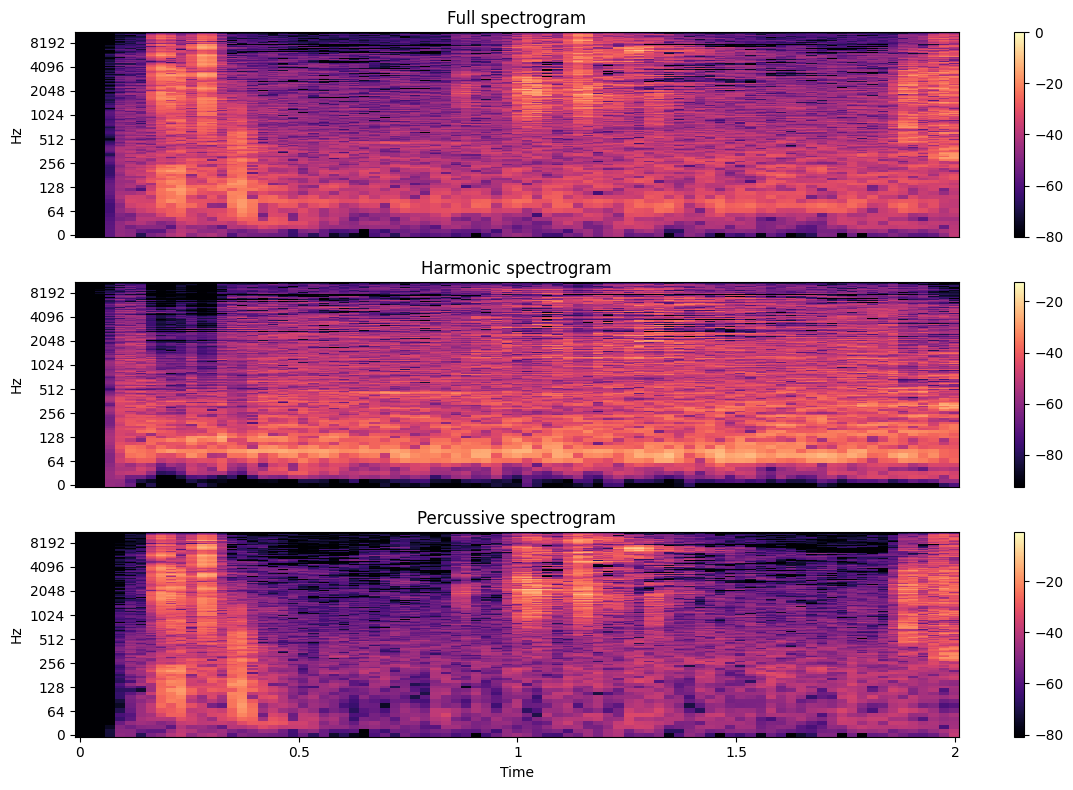

In [7]:
# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')


plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')

plt.tight_layout()

In [8]:
ipd.Audio(y,rate=sr)

In [9]:
ipd.Audio(librosa.istft(D_harmonic),rate=sr)

In [10]:
ipd.Audio(librosa.istft(D_percussive),rate=sr)

# Preparing plots for output

In [11]:
mydpi=150
pix_side=256

(-0.5, 86.5, -0.5, 83.5)

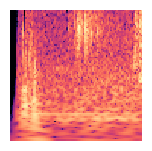

In [12]:
plt.figure(figsize=(pix_side/mydpi, pix_side/mydpi))

CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
librosa.display.specshow(CQT,x_axis=None,y_axis=None)
plt.axis('off')

###the spectrogram of the percussive content in the same format.

(-0.5, 86.5, -0.5, 83.5)

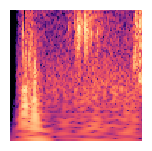

In [13]:
plt.figure(figsize=(pix_side/mydpi, pix_side/mydpi))

CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(librosa.istft(D_percussive), sr=sr)), ref=np.max)
p=librosa.display.specshow(CQT,x_axis=None,y_axis=None)
plt.axis('off')

**save the file**

In [14]:
p.figure.savefig('test.png')

**opening the file**

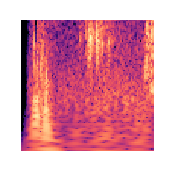

In [15]:
from IPython.display import Image
Image(filename='test.png') 

# Creating training dataset

In [16]:
!pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
class Spectrogram:
  def __init__(self, audiofile_path, dpi=150, side_px=256, total_duration=10, duration=2):
    import numpy as np
    import matplotlib.pyplot as plt

    import librosa
    import librosa.display

    import os

    import soundfile as sf

    filepath, extension = os.path.splitext(audiofile_path)

    slices = int(total_duration / duration)

    for i in range(slices):
      spectrogram_path = filepath + '_' + str(i) + '.png'
      audio_slice_path = filepath + '_' + str(i) + '.wav'
      y, sr = librosa.load(audiofile_path,
                     duration=duration,
                     offset=duration*i)
      sf.write(audio_slice_path,y,sr)
      D = librosa.stft(y)
      D_harmonic, D_percussive = librosa.decompose.hpss(D)
      # Pre-compute a global reference power from the input spectrum
      rp = np.max(np.abs(D))
      plt.figure(figsize=(side_px/dpi, side_px/dpi))

      CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(librosa.istft(D_percussive), sr=sr)), ref=np.max)
      p=librosa.display.specshow(CQT,x_axis=None,y_axis=None)
      plt.axis('off')
      figure = p.figure
      figure.savefig(spectrogram_path)
      plt.close(figure)

# New Section

In [19]:
import os
dirs = [base_dir+'knocking2/',base_dir+'normal2/']

for dirry in dirs:
  print(dirry)
  for filename in os.listdir(dirry):
    if filename.endswith('.wav'):
      print(filename)
      Spectrogram(dirry+filename)

/content/gdrive/MyDrive//Engine_knocking_dataset/knocking2/
002_3.wav


<ipython-input-17-d4aea453c646>:20: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audiofile_path,
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=256 is too large for input signal of length=0
  warnings.warn(
<ipython-input-17-d4aea453c646>:20: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audiofile_path,
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	I

001_1.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=256 is too large for input signal of length=160
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=256 is too large for input signal of length=80
  warnings.warn(


003_60.wav
005_3.wav
002_2.wav
003_02.wav
003_01.wav
002_5.wav
002_4.wav
003_04.wav
003_03.wav
003_06.wav
003_05.wav
003_11.wav
003_10.wav
003_09.wav
003_08.wav
003_07.wav
003_13.wav
003_12.wav
003_15.wav
003_14.wav
003_17.wav
003_16.wav
003_19.wav
003_18.wav
003_23.wav
003_22.wav
003_21.wav
003_20.wav
003_25.wav
003_24.wav
003_28.wav
003_27.wav
003_26.wav
003_32.wav
003_31.wav
003_30.wav
003_29.wav
003_34.wav
003_33.wav
003_36.wav
003_35.wav
003_38.wav
003_37.wav
003_40.wav
003_39.wav
003_44.wav
003_43.wav
003_42.wav
003_41.wav
003_49.wav
003_48.wav
003_47.wav
003_46.wav
003_45.wav
003_53.wav
003_52.wav
003_51.wav
003_50.wav
003_57.wav
003_56.wav
003_55.wav
003_54.wav
005_2.wav
005_1.wav
003_59.wav
003_58.wav
006_5.wav
006_4.wav
006_3.wav
006_2.wav
006_1.wav
002_1.wav
006_6.wav
/content/gdrive/MyDrive//Engine_knocking_dataset/normal2/
006_1.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=256 is too large for input signal of length=240
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=256 is too large for input signal of length=120
  warnings.warn(


005_1.wav
004_1.wav
002_9 (1).wav
007_2 (1).wav
006_2 (1).wav
001_1.wav
002_9.wav
005_1 (1).wav
007_2.wav
006_1 (1).wav
004_1 (1).wav
006_2.wav
001_2.wav
001_3.wav
001_6.wav
001_5.wav
001_4.wav
002_2.wav
002_1.wav
002_4.wav
002_3.wav
002_6.wav
002_5.wav
002_8.wav
002_7.wav
003_2.wav
003_1.wav
007_1.wav
007_3.wav
008_2.wav
008_1.wav
002_4 (1).wav
002_3 (1).wav
002_6 (1).wav
002_5 (1).wav
002_8 (1).wav
002_7 (1).wav
003_2 (1).wav
003_1 (1).wav
007_1 (1).wav
007_3 (1).wav
001_1 (1).wav
008_2 (1).wav
008_1 (1).wav
001_3 (1).wav
001_2 (1).wav
001_5 (1).wav
001_4 (1).wav
002_1 (1).wav
001_6 (1).wav
002_2 (1).wav


In [26]:
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


# Importing fastai

In [1]:
from fastai.vision import *

In [2]:
classes = ['knocking','normal']

In [37]:
path =Path('/content/gdrive/MyDrive/Engine_knocking_dataset2')

In [36]:
!ls /content/gdrive/MyDrive/Engine_knocking_dataset2


knocking  knocking2  normal  normal2


**Validating Image Files**

In [4]:
for c in classes:
    print(c)
    verify_images(path/c)

knocking
normal


In [36]:
!pip install fastai==1.0.58

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.7/236.7 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 KB 33.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19188 sha256=22de8a8833abcb3a91a4452b76348d5baff5c9379f7d64de5a433c7752daf130
  Stored in directory: /root/.cache/pip/wheels/f6/d8/b0/15cfd7805d39250ac29318105f09b1750683387630d68423e1
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.12
    Uninstalling fastai-2.7.12:
      Successfully uninstalled fastai-2.7.12


In [5]:
import numpy as np
from fastai.vision.data import ImageDataBunch

# Define Data Object

In [38]:

# ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=224, num_workers=4).normalize(imagenet_stats).fillna(0)
try:
  np.random.seed(42)
  data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=224, num_workers=4).normalize(imagenet_stats)
except:
  print('exception')

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: User

In [39]:
data.classes

['knocking2', 'normal2']

# display Images from dataset

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning

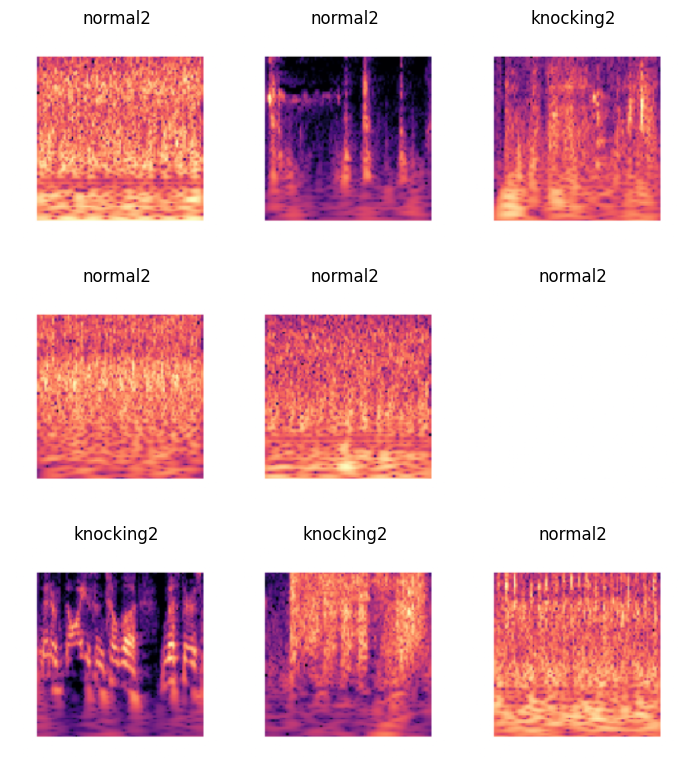

In [40]:
data.show_batch(rows=3, figsize=(7,8))

# Show image classes and counts

In [41]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['knocking2', 'normal2'], 2, 508, 127)

# Fetch resnet34 model

In [42]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 226MB/s]


# Train model

In [43]:
learn.fit_one_cycle(4)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old 

# Save model

In [44]:
learn.save('stage-1')

# Unfreeze Top Layers

In [45]:
learn.unfreeze()

# Final Learning Rate

In [46]:
learn.lr_find()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dis

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


**Plot Learning Rate**

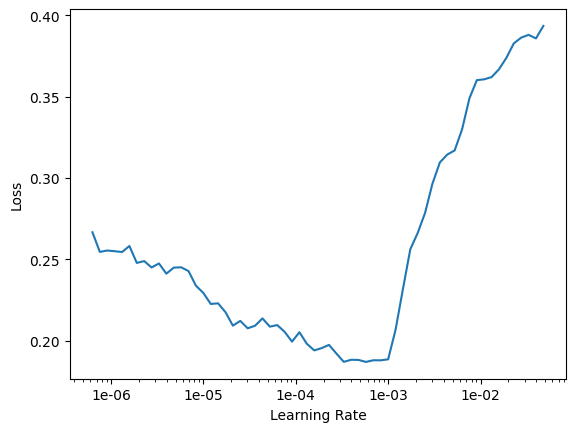

In [47]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

# Retain Top Layers

In [48]:
learn.fit_one_cycle(2, max_lr=slice(4e-6,4e-4))

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning

# Save Model

In [49]:
learn.save('stage-2')

In [ ]:
learn.save('stage-2')

# Interpret Model

In [50]:
###Load Model

SyntaxError: ignored

In [51]:
learn.load('stage-2');

# Create Interpretition From Learner

In [55]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old 

# Plot confusion Matrix

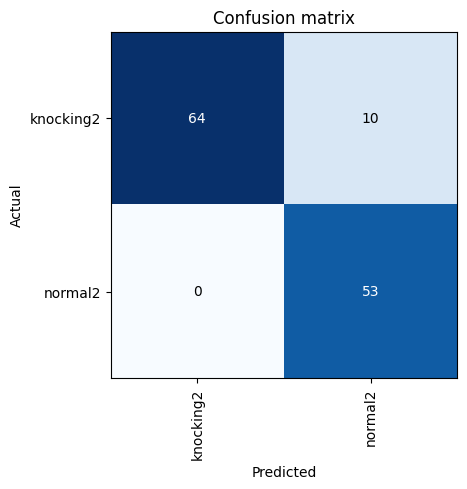

In [56]:
interp.plot_confusion_matrix()

# Plot Top Losses

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning

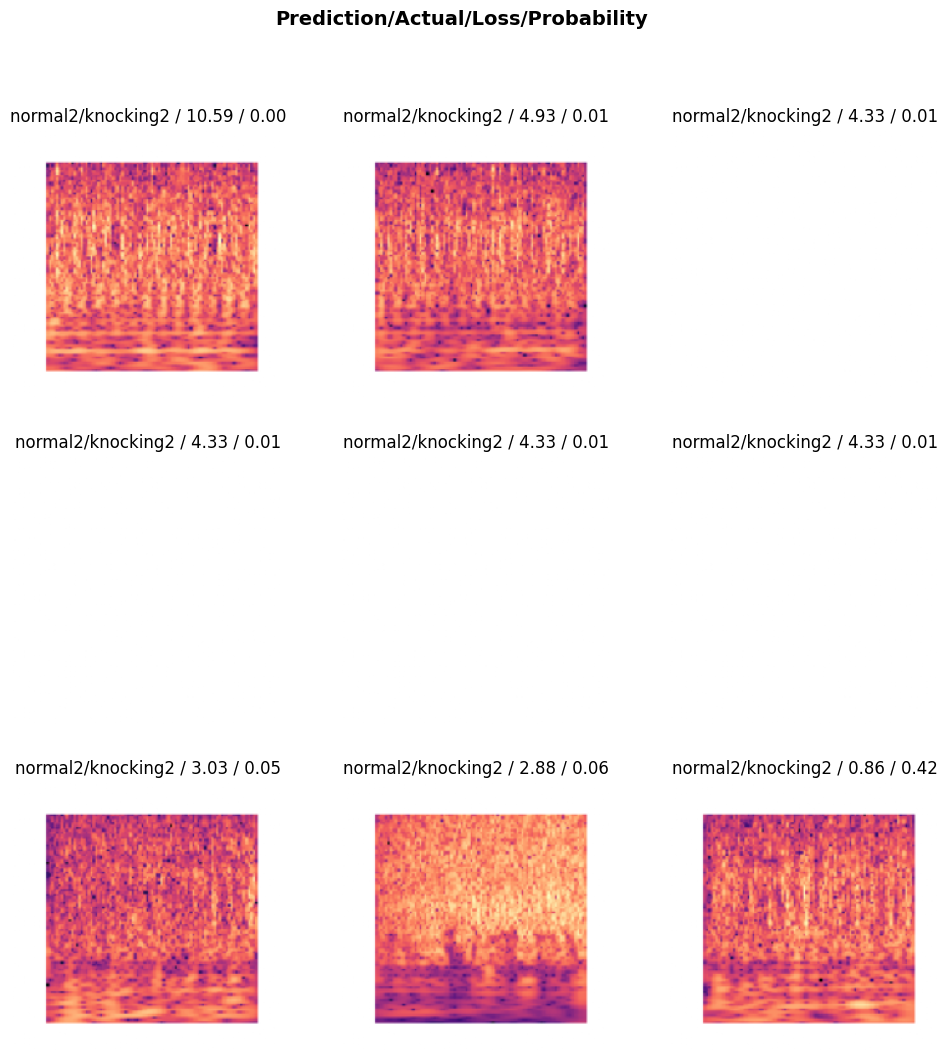

In [57]:
losses,idxs = interp.top_losses(10)

len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(9)

# Show Audiofile Players for Top Losses

In [58]:
import IPython.display as ipd
import os

In [59]:
for img_path in data.valid_ds.items[idxs]:
  filepath, extension = os.path.splitext(img_path)
  audio_slice_path = filepath + '.wav'
  print(filepath)
  ipd.display(ipd.Audio(audio_slice_path))

/content/gdrive/MyDrive/Engine_knocking_dataset2/knocking2/005_2_1


/content/gdrive/MyDrive/Engine_knocking_dataset2/knocking2/005_2_2


/content/gdrive/MyDrive/Engine_knocking_dataset2/knocking2/002_3_2


/content/gdrive/MyDrive/Engine_knocking_dataset2/knocking2/001_1_1


/content/gdrive/MyDrive/Engine_knocking_dataset2/knocking2/002_5_4


/content/gdrive/MyDrive/Engine_knocking_dataset2/knocking2/002_2_4


/content/gdrive/MyDrive/Engine_knocking_dataset2/knocking2/005_1_4


/content/gdrive/MyDrive/Engine_knocking_dataset2/knocking2/002_4_1


/content/gdrive/MyDrive/Engine_knocking_dataset2/knocking2/005_2_0


/content/gdrive/MyDrive/Engine_knocking_dataset2/knocking2/006_4_4


# Export Model

In [60]:
learn.export()

In [65]:
learn.export('Model_v1.pkl')

In [66]:
learn

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4236: UserWarning

Learner(data=ImageDataBunch;

Train: LabelList (508 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
knocking2,knocking2,knocking2,knocking2,knocking2
Path: /content/gdrive/MyDrive/Engine_knocking_dataset2;

Valid: LabelList (127 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal2,knocking2,normal2,knocking2,knocking2
Path: /content/gdrive/MyDrive/Engine_knocking_dataset2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1

In [73]:
!cp /content/model_v1 /content/gdrive/MyDrive/Engine_knocking_dataset2